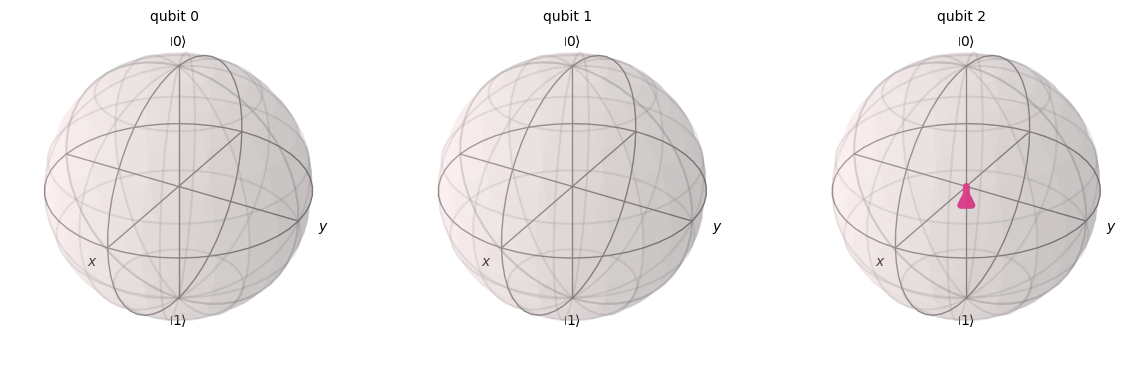

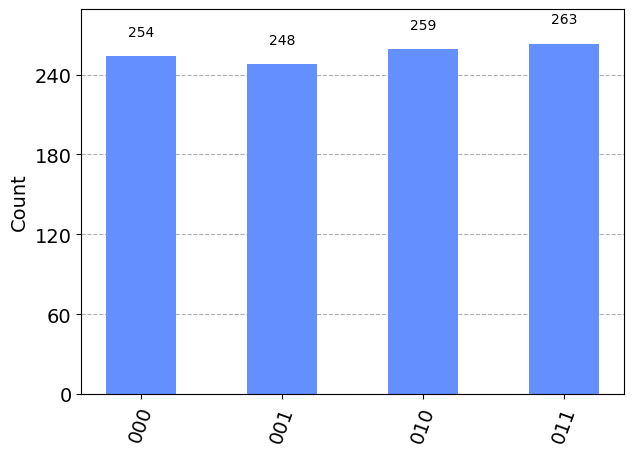

In [6]:
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import AerSimulator, StatevectorSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Create the quantum circuit
qc = QuantumCircuit(3, 3)

# Initialize the qubit to be teleported in some state. Here, using |psi> = |+>
qc.h(0)
qc.barrier()

# Create a Bell pair between qubits 1 and 2 (entanglement)
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# Prepare the teleportation protocol
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# At this point, we'll retrieve the statevector before performing any measurements
simulator = StatevectorSimulator()
result = simulator.run(qc).result()
teleported_state = result.get_statevector()

# Visualize the state on Bloch sphere
bloch_vector = plot_bloch_multivector(teleported_state)
display(bloch_vector)

# Perform the Bell measurement
qc.measure([0, 1], [0, 1])
qc.barrier()

# Conditional operations on the target qubit based on classical measurements
qc.cx(1, 2)
qc.cz(0, 2)

# Now, simulate to get measurement outcomes
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()

# Visualize the measurement outcomes
histogram = plot_histogram(counts)
display(histogram)
